# 二、项目的历史轨迹分析

In [2]:
// 初始化全局参数
var openDigger = require('../src/open_digger');
var repo_id=1136075;var repo_name='cubiq/iscroll'
var year = 2022, startYear = 2015;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2015-2022]

## 1. 每月新增 Star 和 Frok 的个数

#### (1)每月新增Star数

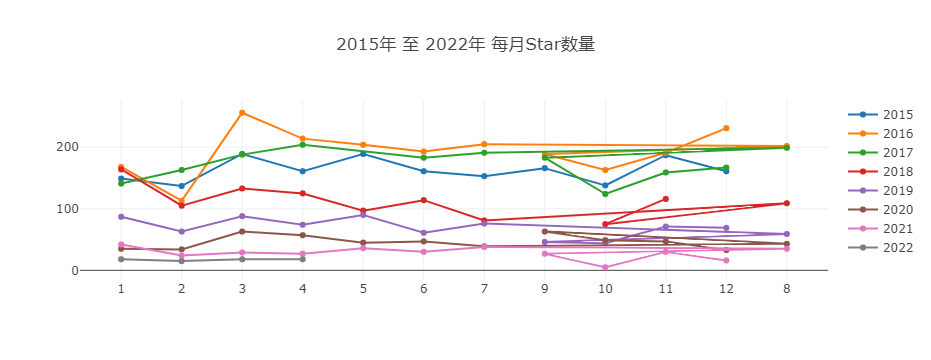

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┬─────┐
│ (index) │ 年份 │ 1月 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 9月 │ 10月 │ 11月 │ 12月 │ 8月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┼─────┤
│    0    │ 2015 │ 149 │ 137 │ 189 │ 161 │ 189 │ 161 │ 153 │ 166 │ 138  │ 187  │ 161  │     │
│    1    │ 2016 │ 168 │ 113 │ 256 │ 214 │ 204 │ 193 │ 205 │ 189 │ 163  │ 191  │ 231  │ 202 │
│    2    │ 2017 │ 141 │ 163 │ 188 │ 204 │     │ 183 │ 191 │ 183 │ 124  │ 159  │ 167  │ 199 │
│    3    │ 2018 │ 164 │ 105 │ 133 │ 125 │ 97  │ 114 │ 81  │     │  75  │ 116  │      │ 109 │
│    4    │ 2019 │ 87  │ 63  │ 88  │ 74  │ 90  │ 61  │ 76  │ 46  │  44  │  71  │  69  │ 59  │
│    5    │ 2020 │ 35  │ 34  │ 63  │ 57  │ 45  │ 47  │ 39  │ 63  │  49  │  47  │  33  │ 43  │
│    6    │ 2021 │ 42  │ 24  │ 29  │ 27  │ 36  │ 30  │ 38  │ 27  │  5   │  30  │  16  │ 35  │
│    7    │ 2022 │ 18  │ 15  │ 18  │ 18  │     │     │     │     │      │ 

In [26]:
var Alldata=[]
Promise.all(years.map(y => {
    var q = `SELECT  toMonth(created_date) as Month, Count(*) as fork_num
    From github_log.year${y}
    where repo_id =${repo_id} and type='WatchEvent'
    Group by toMonth(created_date)`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
        Alldata=[]
        data.forEach((d,index) => {
            // console.log(d)
            var y=[]
            var x=[]
            d.forEach(e=>{
                y.push(parseInt(e['fork_num']))
                x.push(e['Month'])
            })
            Alldata.push({y: y,x:x,name:years[index]})
            // console.log(Alldata)
        })
        openDigger.render.plotly(Alldata, {
        title:  `${startYear}年 至 ${year}年 每月Star数量`,
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
       table[(d['x'][i])+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
})

#### （2）每月新增fork数

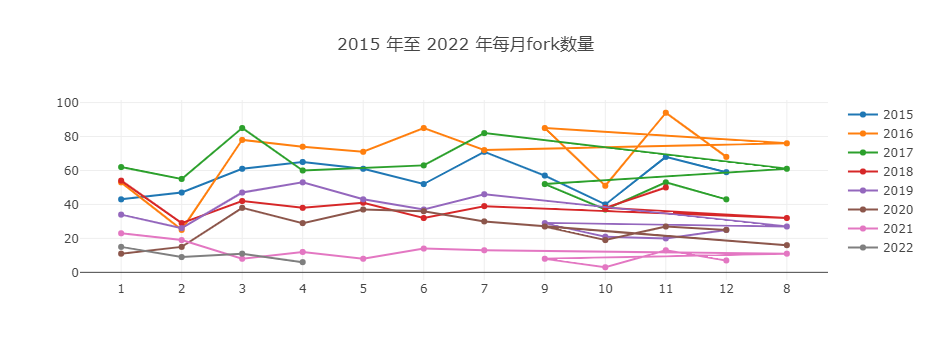

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┬─────┐
│ (index) │ 年份 │ 1月 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 9月 │ 10月 │ 11月 │ 12月 │ 8月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┼─────┤
│    0    │ 2015 │ 43  │ 47  │ 61  │ 65  │ 61  │ 52  │ 71  │ 57  │  40  │  68  │  59  │     │
│    1    │ 2016 │ 53  │ 25  │ 78  │ 74  │ 71  │ 85  │ 72  │ 85  │  51  │  94  │  68  │ 76  │
│    2    │ 2017 │ 62  │ 55  │ 85  │ 60  │     │ 63  │ 82  │ 52  │  37  │  53  │  43  │ 61  │
│    3    │ 2018 │ 54  │ 29  │ 42  │ 38  │ 41  │ 32  │ 39  │     │  38  │  50  │      │ 32  │
│    4    │ 2019 │ 34  │ 26  │ 47  │ 53  │ 43  │ 37  │ 46  │ 29  │  21  │  20  │  25  │ 27  │
│    5    │ 2020 │ 11  │ 15  │ 38  │ 29  │ 37  │ 36  │ 30  │ 27  │  19  │  27  │  25  │ 16  │
│    6    │ 2021 │ 23  │ 19  │  8  │ 12  │  8  │ 14  │ 13  │  8  │  3   │  13  │  7   │ 11  │
│    7    │ 2022 │ 15  │  9  │ 11  │  6  │     │     │     │     │      │ 

In [25]:

var Alldata=[]
Promise.all(years.map(y => {
    var q = `SELECT  toMonth(created_date) as Month, Count(*) as fork_num
    From github_log.year${y}
    where repo_id =${repo_id} and type='ForkEvent'
    Group by toMonth(created_date)`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
        Alldata=[]
        data.forEach((d,index) => {
            var y=[]
            var x=[]
            d.forEach(e=>{
                y.push(parseInt(e['fork_num']))
                x.push(e['Month'])
            })
            Alldata.push({y: y,x:x,name:years[index]})
            // console.log(Alldata)
        })
         openDigger.render.plotly(Alldata, {
        title:  `${startYear} 年至 ${year} 年每月fork数量`,
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
        table[(d['x'][i])+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
}      
        );

### 2. 每月打开 Issue 和 关闭 Issue 的个数

#### （1）每月打开 Issue个数

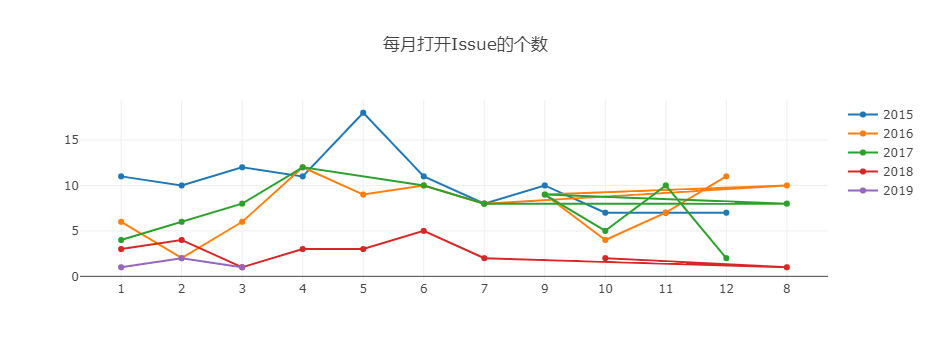

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 1月 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 8月 │ 9月 │ 10月 │ 11月 │ 12月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┤
│    0    │ 2015 │ 11  │ 10  │ 12  │ 11  │ 18  │ 11  │  8  │ 10  │  7  │  7   │  7   │      │
│    1    │ 2016 │  6  │  2  │  6  │ 12  │  9  │ 10  │  8  │ 10  │  9  │  4   │  7   │  11  │
│    2    │ 2017 │  4  │  6  │  8  │ 12  │ 10  │  8  │  8  │  9  │  5  │  10  │  2   │      │
│    3    │ 2018 │  3  │  4  │  1  │  3  │  3  │  5  │  2  │  1  │  2  │      │      │      │
│    4    │ 2019 │  1  │  2  │  1  │     │     │     │     │     │     │      │      │      │
│    5    │ 2020 │     │     │     │     │     │     │     │     │     │      │      │      │
│    6    │ 2021 │     │     │     │     │     │     │     │     │     │      │      │      │
│    7    │ 2022 │     │     │     │     │     │     │     │     │     │  

In [6]:
Promise.all(years.map(y => {
    var q = `SELECT toMonth(created_date) as Month, count(*) as issue_created_cnt
    FROM github_log.year${y}
    WHERE repo_id = ${repo_id} and type='IssuesEvent' and action='opened'
    GROUP BY toMonth(created_date)`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    var Alldata=[]
    data.forEach((d,index) => {
        var y=[]
        var x=[]
         d.forEach(e=>{
             y.push(parseInt(e['issue_created_cnt']))
             x.push(e['Month'])
             })
        Alldata.push({y:y,x:x,name:years[index]})
        })
    openDigger.render.plotly(Alldata, {
        title: '每月打开Issue的个数',
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
        table[(i+1)+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
})

#### （2）每月关闭issue个数

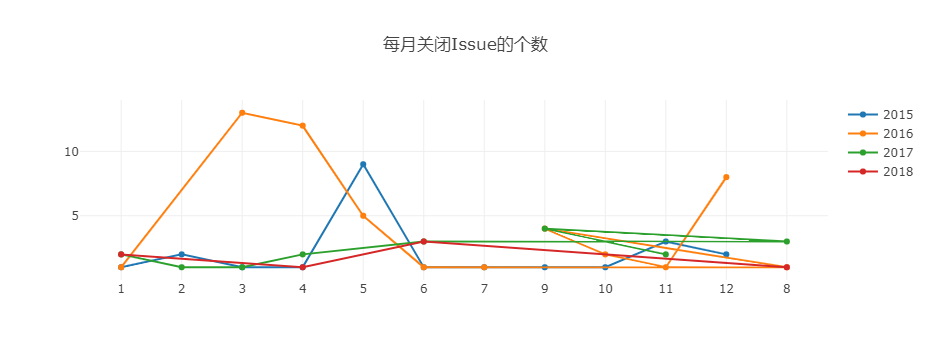

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┐
│ (index) │ 年份 │ 1月 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 8月 │ 9月 │ 10月 │ 11月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┤
│    0    │ 2015 │  1  │  2  │  1  │  1  │  9  │  1  │  1  │  1  │  1  │  3   │  2   │
│    1    │ 2016 │  1  │ 13  │ 12  │  5  │  1  │  1  │  1  │  4  │  2  │  1   │  8   │
│    2    │ 2017 │  2  │  1  │  1  │  2  │  3  │  3  │  4  │  2  │     │      │      │
│    3    │ 2018 │  2  │  1  │  3  │  1  │     │     │     │     │     │      │      │
│    4    │ 2019 │     │     │     │     │     │     │     │     │     │      │      │
│    5    │ 2020 │     │     │     │     │     │     │     │     │     │      │      │
│    6    │ 2021 │     │     │     │     │     │     │     │     │     │      │      │
│    7    │ 2022 │     │     │     │     │     │     │     │     │     │      │      │
└─────────┴──────┴─────┴─────┴─────┴─────┴─────┴─────┴──

In [8]:
Promise.all(years.map(y => {
    var q = `SELECT toMonth(created_date) as Month, count(*) as issue_closed_cnt
    FROM github_log.year${y}
    WHERE repo_id = ${repo_id} and type='IssuesEvent' and action='closed'
    GROUP BY toMonth(created_date)`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    var Alldata=[]
    data.forEach((d,index) => {
        var y=[]
        var x=[]
         d.forEach(e=>{
             y.push(parseInt(e['issue_closed_cnt']))
             x.push(e['Month'])
             })
        Alldata.push({y:y,x:x,name:years[index]})
        })
    openDigger.render.plotly(Alldata, {
        title: '每月关闭Issue的个数',
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
        table[(i+1)+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
})

### 3. 每月打开 PR 和合入 PR 的个数（注意，关闭 PR 不等于合入）

#### （1）每月打开 PR 个数

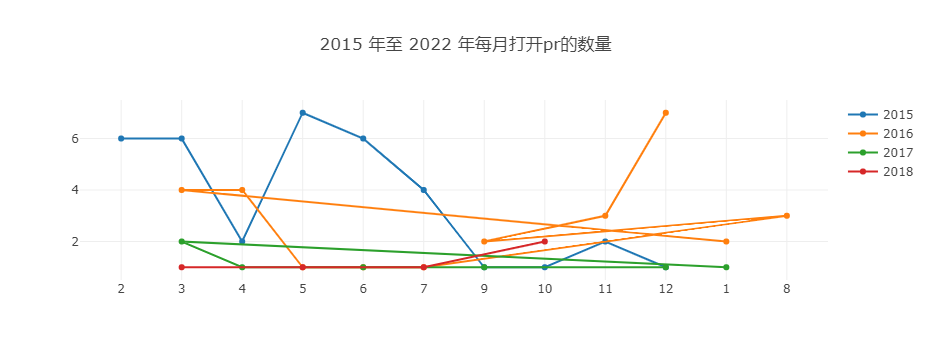

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┬─────┬─────┐
│ (index) │ 年份 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 9月 │ 10月 │ 11月 │ 12月 │ 1月 │ 8月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┼─────┼─────┤
│    0    │ 2015 │  6  │  6  │  2  │  7  │  6  │  4  │  1  │  1   │  2   │  1   │     │     │
│    1    │ 2016 │     │  4  │  4  │  1  │  1  │  1  │  2  │      │  3   │  7   │  2  │  3  │
│    2    │ 2017 │     │  2  │  1  │     │  1  │     │  1  │      │      │  1   │  1  │     │
│    3    │ 2018 │     │  1  │     │  1  │     │  1  │     │  2   │      │      │     │     │
│    4    │ 2019 │     │     │     │     │     │     │     │      │      │      │     │     │
│    5    │ 2020 │     │     │     │     │     │     │     │      │      │      │     │     │
│    6    │ 2021 │     │     │     │     │     │     │     │      │      │      │     │     │
│    7    │ 2022 │     │     │     │     │     │     │     │      │      │

In [9]:
var Alldata=[]
Promise.all(years.map(y => {
    var q =  `SELECT  toMonth(created_date) as Month, count(*) open
    From github_log.year${y}
    where repo_id =${repo_id} and type='PullRequestEvent' and action='opened'
    Group By toMonth(created_date)`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
        Alldata=[]
        data.forEach((d,index) => {
            var y=[]
            var x=[]
            d.forEach(e=>{
                y.push(parseInt(e['open']))
                x.push(e['Month'])
            })
            Alldata.push({y: y,x:x,name:years[index]})
        })
        openDigger.render.plotly(Alldata, {
        title:  `${startYear} 年至 ${year} 年每月打开pr的数量`,
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
        table[(d['x'][i])+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
}
        );

#### （2）每月合入PR个数（注意，关闭 PR 不等于合入）

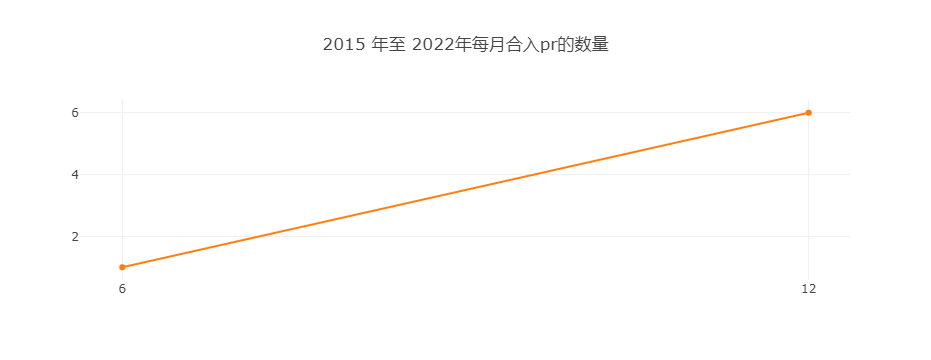

┌─────────┬──────┬─────┬──────┐
│ (index) │ 年份 │ 6月 │ 12月 │
├─────────┼──────┼─────┼──────┤
│    0    │ 2015 │     │      │
│    1    │ 2016 │  1  │  6   │
│    2    │ 2017 │     │      │
│    3    │ 2018 │     │      │
│    4    │ 2019 │     │      │
│    5    │ 2020 │     │      │
│    6    │ 2021 │     │      │
│    7    │ 2022 │     │      │
└─────────┴──────┴─────┴──────┘


In [11]:
var Alldata=[]
Promise.all(years.map(y => {
    var q =   `SELECT  toMonth(created_date) as Month, count(pull_merged) num
    From github_log.year${y}
    where repo_id =${repo_id} and type='PullRequestEvent' and pull_merged=1
    Group By toMonth(created_date)`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
        Alldata=[]
        data.forEach((d,index) => {
            var y=[]
            var x=[]
            d.forEach(e=>{
                y.push(parseInt(e['num']))
                x.push(e['Month'])
            })
            Alldata.push({y: y,x:x,name:years[index]})
        })
        openDigger.render.plotly(Alldata, {
        title:  `${startYear} 年至 ${year}年每月合入pr的数量`,
        xaxis: {type: 'category'}
    });
        var tableData=[]
    Alldata.forEach((d,index)=>{
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
        table[(d['x'][i])+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
}
        );

### 4. 每月在仓库中活跃（只要有日志产生就算）的不同开发者（也就是一个GitHub账号）总数

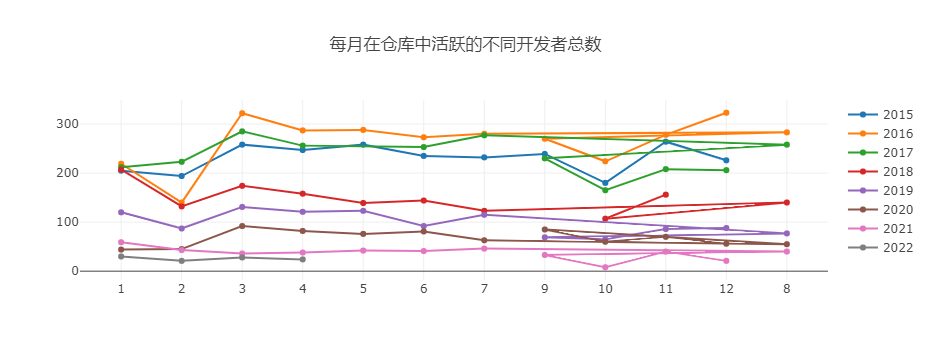

┌─────────┬──────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬─────┬──────┬──────┬──────┐
│ (index) │ 年份 │ 1月 │ 2月 │ 3月 │ 4月 │ 5月 │ 6月 │ 7月 │ 8月 │ 9月 │ 10月 │ 11月 │ 12月 │
├─────────┼──────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼─────┼──────┼──────┼──────┤
│    0    │ 2015 │ 205 │ 194 │ 258 │ 247 │ 258 │ 235 │ 232 │ 239 │ 180 │ 264  │ 226  │      │
│    1    │ 2016 │ 219 │ 140 │ 322 │ 287 │ 288 │ 273 │ 280 │ 283 │ 270 │ 224  │ 278  │ 323  │
│    2    │ 2017 │ 212 │ 223 │ 285 │ 256 │ 253 │ 277 │ 258 │ 230 │ 165 │ 208  │ 206  │      │
│    3    │ 2018 │ 207 │ 132 │ 174 │ 158 │ 139 │ 144 │ 123 │ 140 │ 107 │ 156  │      │      │
│    4    │ 2019 │ 120 │ 87  │ 131 │ 121 │ 123 │ 92  │ 115 │ 77  │ 69  │  65  │  86  │  88  │
│    5    │ 2020 │ 44  │ 45  │ 92  │ 82  │ 76  │ 81  │ 63  │ 55  │ 85  │  60  │  70  │  56  │
│    6    │ 2021 │ 59  │ 43  │ 36  │ 38  │ 42  │ 41  │ 46  │ 40  │ 33  │  8   │  40  │  21  │
│    7    │ 2022 │ 30  │ 21  │ 28  │ 24  │     │     │     │     │     │  

In [13]:
Promise.all(years.map(y => {
    var q =`SELECT toMonth(created_date) as Month, count(distinct(actor_id)) as actor_cnt
    FROM github_log.year${y}
    WHERE repo_id = ${repo_id}
    GROUP BY toMonth(created_date)`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
    var Alldata=[]
    data.forEach((d,index) => {
        var y=[]
        var x=[]
         d.forEach(e=>{
             y.push(parseInt(e['actor_cnt']))
             x.push(e['Month'])
             })
        Alldata.push({y:y,x:x,name:years[index]})
        })
    openDigger.render.plotly(Alldata, {
        title: '每月在仓库中活跃的不同开发者总数',
        xaxis: {type: 'category'}
    });
    var tableData=[]
    Alldata.forEach((d,index)=>{
    //console.log(d)
    var table={}
    table['年份']=d['name']
    for(var i = 0;i<d['y'].length;i++){
        table[(i+1)+'月']=d['y'][i]
        }
    tableData.push(table)
});
    console.table(tableData)
})

### 5. Issue 从打开到关闭的平均时长和中位数（单位：天）

In [27]:
Promise.all(years.map(y => {
    var q = `SELECT dateDiff('day', issue_created_at, issue_closed_at) AS issue_lifetime_day
    FROM github_log.year${y}
    WHERE repo_id = ${repo_id} and type='IssuesEvent' AND action='closed'`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
       var Gap_sum=0
       var pr_num=0
       var Gap=[]
        data.forEach((d,index) => {
           if(d.length!=0){
               d.forEach(e=>{
                   Gap_sum+= parseInt(e['issue_lifetime_day'])
                   pr_num+=1
                   Gap.push(parseInt(e['issue_lifetime_day']))
               })}
        })
    console.log(startYear,'年至',year,'年Issue从打开到关闭的总数量：',pr_num)
    console.log(startYear,'年至',year,'年Issue从打开到关闭的平均时长：',(Gap_sum/pr_num).toFixed(0),'（天）')
    //计算中位数
    Gap.sort()//排个序
    var mid=0
    if(Gap.length%2===0){ //判断数组是奇数还是偶数
       mid = (Gap[parseInt(Gap.length/2)]+Gap[parseInt(Gap.length/2-1)])/2//偶数个取中间两个数的平均数
   }else{
       mid = Gap[parseInt(Gap.length/2)]//奇数个取最中间那个数
  }
    console.log(startYear,'年至',year,'年Issue从打开到关闭的中位数：',mid,'（天）')
}
        );

2015 年至 2022 年Issue从打开到关闭的总数量： 97
2015 年至 2022 年Issue从打开到关闭的平均时长： 154 （天）
2015 年至 2022 年Issue从打开到关闭的中位数： 167 （天）


### 6. PR 从打开到合入的平均时长和中位数（单位：天）

In [24]:
var Alldata=[]
Promise.all(years.map(y => {
     var q = `SELECT  TIMESTAMPDIFF(Day, temp.created_at, temp1.pull_merged_at) AS Gap,temp.created_at as Creared_Date,temp1.pull_merged_at as merged_Date,temp1.issue_title
    From github_log.year${y} as temp1,(SELECT created_at,issue_id
        FROM github_log.year${y}
        Where repo_id =${repo_id} and type='PullRequestEvent' and action='opened')as temp
    where temp1.repo_id =${repo_id} and temp1.type='PullRequestEvent'  and temp1.pull_merged=1 and temp.issue_id=temp1.issue_id`;
    return openDigger.driver.clickhouse.query(q);
})).then(data => {
       var Gap_sum=0
       var pr_num=0
       var Gap=[]
        data.forEach((d,index) => {
           if(d.length!=0){
               d.forEach(e=>{
                   Gap_sum+= parseInt(e['Gap'])
                   pr_num+=1
                   Gap.push(parseInt(e['Gap']))
               })}
        })
    console.log(startYear,'年至',year,'年被合并的PR总数量：',pr_num)
    console.log(startYear,'年至',year,'年PR从打开到合入的平均时长：',(Gap_sum/pr_num).toFixed(2),'（天）')
    //计算中位数
    Gap.sort()//排个序
    var mid=0
    if(Gap.length%2===0){ //判断数组是奇数还是偶数
       mid= (Gap[Gap.length/2]+Gap[Gap.length/2-1])/2//偶数个取中间两个数的平均数
   }else{
       mid = Gap[parseInt(Gap.length/2)]//奇数个取最中间那个数
  }
    console.log(startYear,'年至',year,'年PR从打开到合入的中位数：',mid,'（天）')
}
        );

2015 年至 2022 年被合并的PR总数量： 7
2015 年至 2022 年PR从打开到合入的平均时长： 24.71 （天）
2015 年至 2022 年PR从打开到合入的中位数： 0 （天）


### 7. Issue和PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

#### （1）Issue从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

In [17]:
var year = 2022, startYear = 2015;
var years = Array.from({ length: year - startYear + 1 }, (_, i) => i + startYear); // [2015-2022]
Promise.all(years.map(y => {
    var q = 
    `SELECT a.issue_number,issue_title,min(TIMESTAMPDIFF(DAY, issue_created_at, comment_created_at)) GapDay
        FROM (SELECT created_at issue_created_at,issue_id,issue_number,issue_title
            FROM github_log.year${y}
            Where repo_id =${repo_id} and type='IssuesEvent' and action='opened') a
            LEFT JOIN (SELECT issue_id comment_id,issue_number comment_number,created_at comment_created_at
                            FROM github_log.year${y}
                            Where repo_id =${repo_id} and type='IssueCommentEvent' and action='created' ) b
         ON a.issue_id=b.comment_id
         where b.comment_number!=0
         group by a.issue_number,issue_title` ;
    return openDigger.driver.clickhouse.query(q);
})).then(data=>{
    var Gap_sum=0
    var pr_num=0
    var Gap=[]
    data.forEach((d,index)=>{
    d.forEach((e,index)=>{
        Gap_sum+= parseInt(e['GapDay'])
        pr_num+=1
        Gap.push(parseInt(e['GapDay']))
    })
})
    console.log(startYear,'年至',year,'年Issue从打开有人回复的总数量：',pr_num)
    console.log(startYear,'年至',year,'年Issue从打开到第一次有人回复的平均时长：',(Gap_sum/pr_num).toFixed(2),'（天）')
    //计算中位数
    Gap.sort()//排个序
    var mid=0
    if(Gap.length%2===0){ //判断数组是奇数还是偶数
       mid= (Gap[Gap.length/2]+Gap[Gap.length/2-1])/2//偶数个取中间两个数的平均数
   }else{
       mid = Gap[parseInt(Gap.length/2)]//奇数个取最中间那个数
  }
    console.log(startYear,'年至',year,'年Issue从打开到第一次有人回复的平均时长：',mid,'（天）')
 }
        )

2015 年至 2022 年Issue从打开有人回复的总数量： 152
2015 年至 2022 年Issue从打开到第一次有人回复的平均时长： 19.82 （天）
2015 年至 2022 年Issue从打开到第一次有人回复的平均时长： 68 （天）


#### (2) PR从打开到第一次有人回复（非本人回复）的平均时长和中位数（单位：天）

In [20]:
Promise.all(years.map(y => {
     var q =  
        `SELECT a.pr_number,issue_title,min(TIMESTAMPDIFF(DAY, pr_created_at, comment_created_at)) GapDay
        FROM (SELECT created_at pr_created_at,issue_number pr_number,issue_title
            FROM github_log.year${y}
            Where repo_id =${repo_id} and type='PullRequestEvent' and action='opened') a
            LEFT JOIN (SELECT issue_number comment_number,created_at comment_created_at
                            FROM github_log.year${y}
                            Where repo_id =${repo_id} and type='IssueCommentEvent' and action='created' ) b
         ON a.pr_number=b.comment_number
         where b.comment_number!=0
         group by a.pr_number,issue_title`
    return openDigger.driver.clickhouse.query(q);
})).then(data=>{
    var Gap_sum=0
    var pr_num=0
    var Gap=[]
    data.forEach((d,index)=>{
    d.forEach((e,index)=>{
        Gap_sum+= parseInt(e['GapDay'])
        pr_num+=1
        Gap.push(parseInt(e['GapDay']))
    })
})
    console.log(startYear,'年至',year,'年PR从打开到第一次有人回复的总数量：',pr_num)
    console.log(startYear,'年至',year,'年PR从打开到第一次有人回复的平均时长：',(Gap_sum/pr_num).toFixed(2),'（天）')
    //计算中位数
    Gap.sort()//排个序
    var mid=0
    if(Gap.length%2===0){ //判断数组是奇数还是偶数
       mid= (Gap[Gap.length/2]+Gap[Gap.length/2-1])/2//偶数个取中间两个数的平均数
   }else{
       mid = Gap[parseInt(Gap.length/2)]//奇数个取最中间那个数
  }
    console.log(startYear,'年至',year,'年PR从打开到第一次有人回复的平均时长：',mid,'（天）')
}
        )

2015 年至 2022 年PR从打开到第一次有人回复的总数量： 15
2015 年至 2022 年PR从打开到第一次有人回复的平均时长： 21.73 （天）
2015 年至 2022 年PR从打开到第一次有人回复的平均时长： 1 （天）


### 8.根据你观察到的仓库的历史数据，尝试找到几个你认为关键或值得注意的时间节点

答：2015.5-2015.12:仓库打开pr数持续下降,仓库逐渐进入稳定期

    2016.4:仓库发布新版本5.2.0  
    
    2016.5-2016.12:仓库打开pr数持续升高，仓库持续修复新版本出现的bug    
        
    2016.12:仓库最后一次对新版本Commint修复    
    
    2019.4:仓库被归档